# Logistic Regression - Iterative solution

## We begin by downloading all necessary libraries
 

In [7]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import datasets

## Download and visualise the data

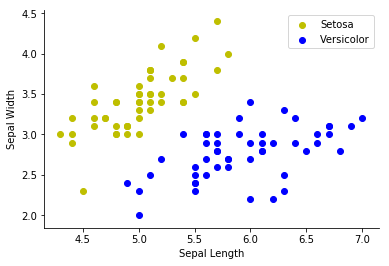

In [8]:
data = datasets.load_iris()
X = data.data[:100, :2]
y = data.target[:100]
X_full = data.data[:100, :]

setosa = plt.scatter(X[:50,0], X[:50,1], c='y')
versicolor = plt.scatter(X[50:,0], X[50:,1], c='b')
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.legend((setosa, versicolor), ("Setosa", "Versicolor"))
sns.despine()

## Define necessary functions

In [9]:
def sigmoid(theta, x):
    return 1. / (1. + np.exp(-np.dot(x, theta)))

def gradient(theta, x, y):
    first_calc = sigmoid(theta, x) - np.squeeze(y)
    final_calc = np.dot(x.transpose(), first_calc)
    return final_calc

def cost_func(theta, x, y):
    hypothesis = sigmoid(theta,x)
    y = np.squeeze(y)
    step1 = y * np.log(hypothesis)
    step2 = (1-y) * np.log(1 - hypothesis)
    final = -step1 - step2
    return np.mean(final)

def gradient_descent(theta_opt, X, y, alpha=.001, min_change=.001):
    # Set-up cost-iteration list
    cost_iter = []
    cost = cost_func(theta_opt, X, y)
    cost_iter.append([0, cost])
    change_cost = 1
    i = 1
    while(change_cost > min_change):
        old_cost = cost
        theta_opt = theta_opt - (alpha * gradient(theta_opt, X, y))
        cost = cost_func(theta_opt, X, y)
        cost_iter.append([i, cost])
        change_cost = old_cost - cost
        i+=1
    return theta_opt, np.array(cost_iter)

## Optimize the parameters

In [10]:
X = np.c_[ np.ones(100), X]
shape = X.shape[1]
y_flip = np.logical_not(y) #flip Setosa to be 1 and Versicolor to zero to be consistent
betas = np.zeros(shape)
fitted_values, cost_iter = gradient_descent(betas, X, y_flip)
print(fitted_values)

[ 0.20325449 -1.22054519  2.0701444 ]


## Predict values

In [11]:
def pred_values(theta, X, hard=True):
    pred_prob = sigmoid(theta, X)
    pred_value = np.where(pred_prob >= .5, 1, 0)
    if hard:
        return pred_value
    return pred_prob

predicted_y = pred_values(fitted_values, X)
predicted_y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0])

In [12]:
np.sum(y_flip == predicted_y)

99

## Iteration vs. Cost graph 

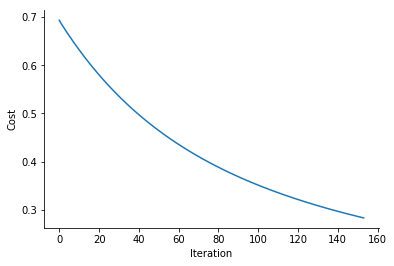

In [13]:
plt.plot(cost_iter[:,0], cost_iter[:,1])
plt.ylabel("Cost")
plt.xlabel("Iteration")
sns.despine()